In [1]:
import pandas as pd
import numpy as np
from omadb import Client
import logging 
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
metfol =['OMAAugustus20', 'OMARP20', 'OMAtopEnsembl20', 'OMAtopNCBI20']
allmetfol= ['OMAAugustus20', 'OMARP20', 'OMAtopNCBI20', 'OMAprimNCBI20', 'OMAtopEnsembl20', 'OMAprimEnsembl20']

## HOG size distribution

Need to run the first HOG statistics cell first

In [3]:
mypaleta=['#BF812D', '#F6E8C3', '#C7EAE5', '#35978F']
colors=("tab:blue", "tab:orange", "tab:green", "tab:red" )
paleta2= ["#858e35", "#b13a40", "#54828a", "#b8713c"]

In [6]:
hog_profiles
hogprofilesplot = hog_profiles_total.loc[hog_profiles_total["Method"].isin(metfol)]
hogprofilesplot

,Group,CHICK,CHPIB,CIOIN,DANRE,ECNAU,ERCAL,FELCA,GADMO,HUMAN,...,ORANA,ORYLA,PHOSI,PODMU,SALTR,SARHA,TAEGU,XENTR,total_nb_genes,Method
0,HOG00001,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
1,HOG00002,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
3,HOG00004,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
4,HOG00005,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133060,HOG26674,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopNCBI20
133061,HOG26675,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopNCBI20
133062,HOG26676,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopNCBI20
133063,HOG26677,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopNCBI20


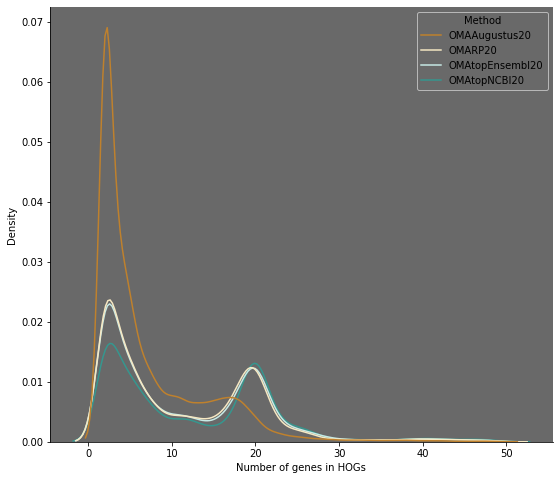

In [9]:
hogprofiles = hog_profiles_total.loc[hog_profiles_total["total_nb_genes"]<50]
sns.set_style(rc = {'axes.facecolor': 'dimgrey'})
fig= plt.subplots(figsize=(9,8))
# https://medium.com/swlh/how-to-create-a-seaborn-palette-that-highlights-maximum-value-f614aecd706b

fig = sns.kdeplot(hogprofiles, hue='Method',palette=mypaleta, x='total_nb_genes')
    #axis[i].set(ylabel=None)
fig.set(xlabel='Number of genes in HOGs')
    #axis[i].set_ylim((0,16000))
    #axis[i].set_xlim((0,50))
    #fig.set_xticklabels(['0','2','10','20','30','40','50','60'])
sns.despine()

(0.0, 0.22)

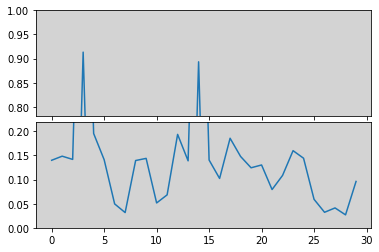

In [66]:
np.random.seed(19680801)

pts = np.random.rand(30)*.2
# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

#ax1.spines.bottom.set_visible(False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


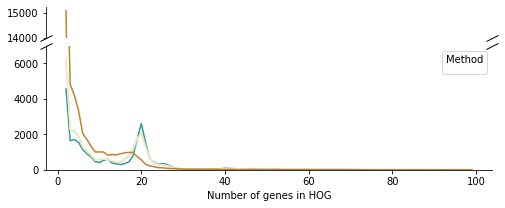

In [10]:
pd.set_option('display.max_rows', 112)
HOGsizestats=hogprofilesplot.groupby(['Method','total_nb_genes']).describe()
#savefig...

In [12]:
HOGsizestats=pd.read_csv('HOGsizestats.csv')

In [16]:
HOGsizestats

,Unnamed: 0,Unnamed: 1,CHICK,CHICK.1,CHICK.2,CHICK.3,CHICK.4,CHICK.5,CHICK.6,CHICK.7,...,TAEGU.6,TAEGU.7,XENTR,XENTR.1,XENTR.2,XENTR.3,XENTR.4,XENTR.5,XENTR.6,XENTR.7
0,NaN,NaN,count,mean,std,min,25%,50%,75%,max,...,75%,max,count,mean,std,min,25%,50%,75%,max
1,Method,total_nb_genes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OMAAugustus20,2,15095.0,0.05087777409738324,0.21975537634719522,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,15095.0,0.08022524014574363,0.27165058371104017,0.0,0.0,0.0,0.0,1.0
3,OMAAugustus20,3,4804.0,0.10116569525395504,0.30773005579324386,0.0,0.0,0.0,0.0,2.0,...,0.0,2.0,4804.0,0.11240632805995004,0.34789171474758046,0.0,0.0,0.0,0.0,2.0
4,OMAAugustus20,4,4209.0,0.15419339510572583,0.37473960749558716,0.0,0.0,0.0,0.0,3.0,...,0.0,3.0,4209.0,0.11546685673556664,0.37504217368253606,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,OMAtopNCBI20,25,349.0,0.997134670487106,0.5544934901893072,0.0,1.0,1.0,1.0,7.0,...,1.0,2.0,349.0,1.0515759312320916,0.584944326945673,0.0,1.0,1.0,1.0,7.0
110,OMAtopNCBI20,26,307.0,1.0423452768729642,1.2940910346202394,0.0,1.0,1.0,1.0,23.0,...,1.0,4.0,307.0,1.013029315960912,0.37897299615870317,0.0,1.0,1.0,1.0,6.0
111,OMAtopNCBI20,27,201.0,0.9751243781094527,0.366576198699174,0.0,1.0,1.0,1.0,3.0,...,1.0,3.0,201.0,1.0696517412935322,0.48489625499631644,0.0,1.0,1.0,1.0,4.0
112,OMAtopNCBI20,28,94.0,1.1382978723404256,1.4263349817663724,0.0,1.0,1.0,1.0,14.0,...,1.0,8.0,94.0,1.1702127659574468,0.8377940552278125,0.0,1.0,1.0,1.0,5.0


In [13]:
# Extract the first row as the new column names
new_header = HOGsizestats.iloc[0]

# Set the new header as column names
HOGsizestats.columns = new_header

HOGsizestats = HOGsizestats[2:]

In [14]:
HOGsizestats = HOGsizestats.iloc[:, :3]
HOGsizestats

,NaN,NaN,count
2,OMAAugustus20,2,15095.0
3,OMAAugustus20,3,4804.0
4,OMAAugustus20,4,4209.0
5,OMAAugustus20,5,3335.0
6,OMAAugustus20,6,2042.0
7,OMAAugustus20,7,1707.0
8,OMAAugustus20,8,1328.0
9,OMAAugustus20,9,1003.0
10,OMAAugustus20,10,1010.0
11,OMAAugustus20,11,999.0


In [16]:
HOGsizestats.columns = ['Method', 'total_nb_genes', 'count']

In [17]:
HOGsizestats

,Method,total_nb_genes,count
2,OMAAugustus20,2,15095.0
3,OMAAugustus20,3,4804.0
4,OMAAugustus20,4,4209.0
5,OMAAugustus20,5,3335.0
6,OMAAugustus20,6,2042.0
7,OMAAugustus20,7,1707.0
8,OMAAugustus20,8,1328.0
9,OMAAugustus20,9,1003.0
10,OMAAugustus20,10,1010.0
11,OMAAugustus20,11,999.0


In [118]:
uschogs.columns = ["Method", "Count20"]
uschogs2.columns=["Method", "Count19"]
allusc = pd.merge(uschogs, uschogs2, how='inner', on='Method')
allusc

,Method,Count20,Count19
0,Ab-initio,19,29
1,RP UP,283,390
2,Ensembl,250,342
3,NCBI,621,614


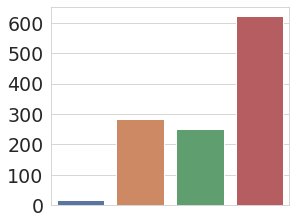

In [124]:
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(4, 3)) #

ax1=sns.barplot(data=allusc, y='Count20', x='Method', palette="deep", ax=ax1)

ax1.set_xlabel('')
ax1.set_xticklabels('')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(100)) 
ax1.tick_params(axis='y', labelsize=19) 

ax1.set_ylabel('')
#ax1.set_ylabel('Number of HOGs', fontsize=18, labelpad=4)

#ax1.set_title('HOGs with 19 Unique Single Copy genes', y=1.03, fontsize=14)
#ax2.set_title('HOGs with 20 USC genes', y=1.03, fontsize=14)

plt.tight_layout(pad=0.3)

plt.savefig('20USCHogs.png',bbox_inches='tight')

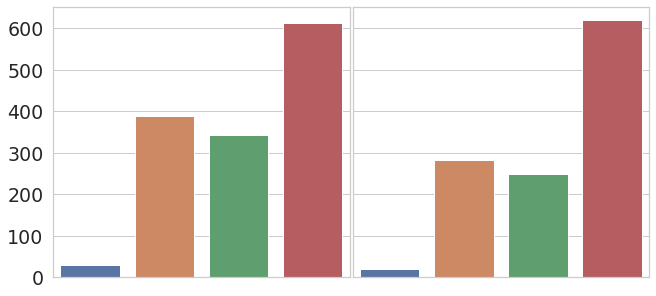

In [136]:
sns.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9, 4)) #

ax1=sns.barplot(data=allusc, y='Count19', x='Method', palette="deep", ax=ax1)
ax2=sns.barplot(data=allusc, y='Count20', x='Method', palette="deep", ax=ax2)

ax1.set_xlabel('')
ax1.set_xticklabels('')
ax2.set_xlabel('')
ax2.set_xticklabels('')
ax2.set_ylabel('')

ax1.tick_params(axis='y', labelsize=19) 

ax1.set_ylabel('')
#ax1.set_ylabel('Number of HOGs', fontsize=18, labelpad=4)

#ax1.set_title('HOGs with 19 Unique Single Copy genes', y=1.03, fontsize=14)
#ax2.set_title('HOGs with 20 USC genes', y=1.03, fontsize=14)

plt.tight_layout(pad=0.3)

plt.savefig('USCHogs.png',bbox_inches='tight')

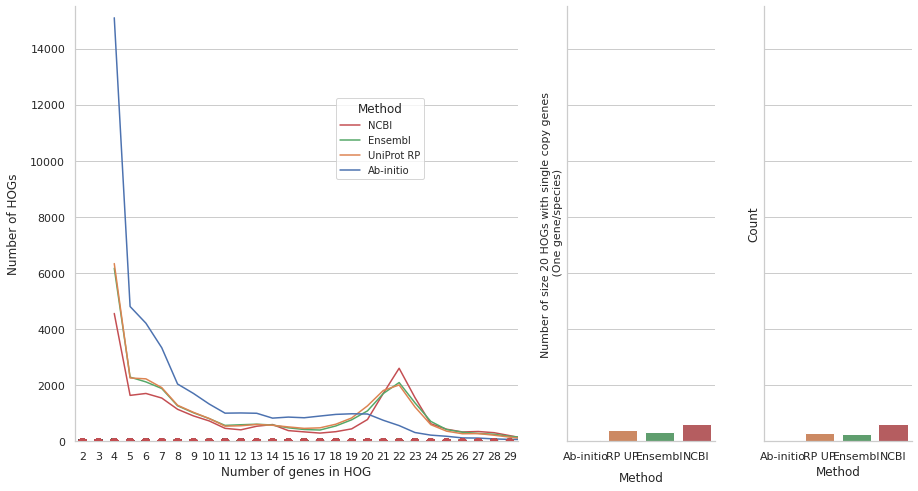

In [73]:

## Can't find the way now to plot the individual dots over the histogram. Maybe I could do
## two subplots and then add the third plot with grid.

sns.set_style("whitegrid")
hogprofiles = hog_profiles_total.loc[hog_profiles_total["total_nb_genes"]<30]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 8), gridspec_kw={'width_ratios': [3, 1, 1]}) #

# https://medium.com/swlh/how-to-create-a-seaborn-palette-that-highlights-maximum-value-f614aecd706b

ax1 = sns.histplot(hogprofiles, hue='Method', x='total_nb_genes', palette="deep", element='poly', fill = False, discrete=True, ax=ax1)

ax1.set(xlabel='Number of genes in HOG')
ax1.set_ylim((0,15500))

#ax3 = ax1.twiny()
#ax3=sns.scatterplot(data=HOGsizestats, x="total_nb_genes", y="count", hue="Method", palette="deep")

sns.stripplot(data=hogprofiles, x='total_nb_genes', y=np.zeros(len(hogprofiles)), hue='Method', jitter=True, palette="deep", ax=ax1)
ax1.legend(title='Method', labels=['NCBI', 'Ensembl', 'UniProt RP', 'Ab-initio'],
           fontsize=10, bbox_to_anchor=(0.8, 0.8))


ax2=sns.barplot(data=uschogs2, y='Count', x='Method', palette="deep", ax=ax2)
ax3=sns.barplot(data=uschogs, y='Count', x='Method', palette="deep", ax=ax3)

ax2.set_ylabel('Number of size 20 HOGs with single copy genes\n (One gene/species)', fontsize=11)
ax1.set_xlabel('Number of genes in HOG', fontsize=12)
ax1.set_ylabel('Number of HOGs', fontsize=12, labelpad=10)
ax2.set_xlabel('Method', fontsize=12, labelpad=10)

sns.despine()
plt.show()

plt.savefig('HOGsize_distribution_20USC.png',bbox_inches='tight')

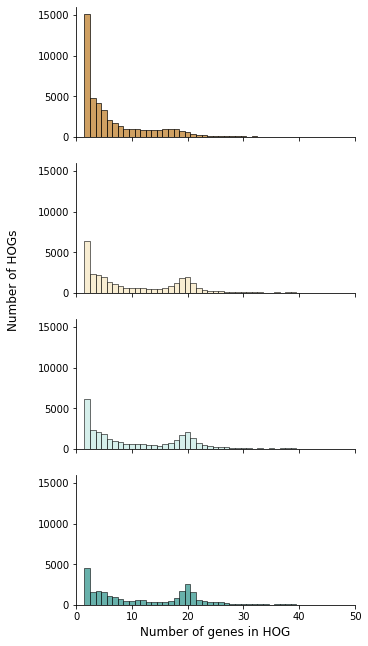

In [13]:
hogprofiles = hog_profiles_total.loc[hog_profiles_total["total_nb_genes"]<40]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True, figsize=(5,11))
axis=[ax1, ax2, ax3, ax4]
# https://medium.com/swlh/how-to-create-a-seaborn-palette-that-highlights-maximum-value-f614aecd706b
for i in range(len(metfol)): 
    tmphogprofiles = hogprofiles.loc[hogprofiles["Method"]==metfol[i]]
    currentaxis = axis[i]
    fig = sns.histplot(tmphogprofiles, color=mypaleta[i], x='total_nb_genes', bins=100, discrete=True, ax=currentaxis)
    axis[i].set(ylabel=None)
    axis[i].set(ylabel=None)
    axis[i].set_ylim((0,16000))
    axis[i].set_xlim((0,50))
    #fig.set_xticklabels(['0','2','10','20','30','40','50','60'])
    sns.despine()

#fig.set(xlabel='Number of genes in HOG', fontsize=12)

ax4.set_xlabel('Number of genes in HOG', fontsize=12)
ax4.set_ylabel('Number of HOGs', fontsize=12)
#fig.set(ylabel='Number of HOGs')
fig.yaxis.set_label_coords(-.2, 2.5)
#plt.savefig('HOGsize_distribution_fix.png',bbox_inches='tight')

In [ ]:
(ax2.legend()labels=['Ab-inito', 'UP RP', 'Ensembl', 'NCBI'],
 labels=['Ab-inito', 'UP RP', 'Ensembl', 'NCBI'],

In [23]:
vividpalette=["#858e35", "#b13a40", "#54828a", "#b8713c"]
vivid2=["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]
vivid2=["green","red", "orange", "blue"]

In [19]:
hogstwenty = hog_profiles_total.loc[hog_profiles_total["total_nb_genes"]==20]

In [6]:
hogsnineteen = hog_profiles_total.loc[hog_profiles_total["total_nb_genes"]==19]

In [7]:
pd.set_option('display.max_columns', None)
hogsnineteen

,Group,CHICK,CHPIB,CIOIN,DANRE,ECNAU,ERCAL,FELCA,GADMO,HUMAN,KAKAP,LEPOC,MOUSE,ORANA,ORYLA,PHOSI,PODMU,SALTR,SARHA,TAEGU,XENTR,total_nb_genes,Method
2164,HOG02165,0,0,0,0,4,0,0,4,0,0,0,0,0,4,0,0,7,0,0,0,19,OMAAugustus20
5495,HOG05496,0,0,0,1,3,0,0,4,0,0,0,0,0,9,0,0,2,0,0,0,19,OMAAugustus20
8272,HOG08273,0,0,0,1,5,0,0,3,0,0,2,0,0,0,0,0,8,0,0,0,19,OMAAugustus20
9926,HOG09927,0,0,0,1,4,2,0,5,0,0,1,0,0,4,0,0,2,0,0,0,19,OMAAugustus20
11068,HOG11069,0,0,0,3,1,11,0,1,0,0,2,0,0,1,0,0,0,0,0,0,19,OMAAugustus20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132617,HOG26231,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,2,1,1,1,19,OMAtopNCBI20
132632,HOG26246,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19,OMAtopNCBI20
132635,HOG26249,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,19,OMAtopNCBI20
132636,HOG26250,1,0,1,1,1,1,1,1,1,0,1,1,0,1,2,1,2,1,1,1,19,OMAtopNCBI20


In [72]:
hogstwenty['singlecopy']= hogstwenty.iloc[:, 1:21].all(1)
hogssinglecopy = hogstwenty[hogstwenty['singlecopy'] == True]
hogssinglecopy

,Group,CHICK,CHPIB,CIOIN,DANRE,ECNAU,ERCAL,FELCA,GADMO,HUMAN,KAKAP,LEPOC,MOUSE,ORANA,ORYLA,PHOSI,PODMU,SALTR,SARHA,TAEGU,XENTR,total_nb_genes,Method,singlecopy
40959,HOG40960,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,20,OMAAugustus20,True
40992,HOG40993,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,20,OMAAugustus20,True
41165,HOG41166,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,20,OMAAugustus20,True
41235,HOG41236,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,20,OMAAugustus20,True
41274,HOG41275,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,20,OMAAugustus20,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132476,HOG26090,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,20,OMAtopNCBI20,True
132494,HOG26108,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,20,OMAtopNCBI20,True
132641,HOG26255,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,20,OMAtopNCBI20,True
132643,HOG26257,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,20,OMAtopNCBI20,True


In [9]:
selected_columns = hogsnineteen.iloc[:, list(range(1, 3)) + list(range(4, 21))]
selected_columns

,CHICK,CHPIB,DANRE,ECNAU,ERCAL,FELCA,GADMO,HUMAN,KAKAP,LEPOC,MOUSE,ORANA,ORYLA,PHOSI,PODMU,SALTR,SARHA,TAEGU,XENTR
2164,0,0,0,4,0,0,4,0,0,0,0,0,4,0,0,7,0,0,0
5495,0,0,1,3,0,0,4,0,0,0,0,0,9,0,0,2,0,0,0
8272,0,0,1,5,0,0,3,0,0,2,0,0,0,0,0,8,0,0,0
9926,0,0,1,4,2,0,5,0,0,1,0,0,4,0,0,2,0,0,0
11068,0,0,3,1,11,0,1,0,0,2,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132617,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,2,1,1,1
132632,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
132635,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
132636,1,0,1,1,1,1,1,1,0,1,1,0,1,2,1,2,1,1,1


In [11]:
hogsnineteen['scnociona']=hogsnineteen.iloc[:, list(range(1, 3)) + list(range(4, 21))].all(1)
hogsscnociona = hogsnineteen[hogsnineteen['scnociona'] == True]
hogsscnociona

<ipython-input-11-0c964b1b6d8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hogsnineteen['scnociona']=hogsnineteen.iloc[:, list(range(1, 3)) + list(range(4, 21))].all(1)


,Group,CHICK,CHPIB,CIOIN,DANRE,ECNAU,ERCAL,FELCA,GADMO,HUMAN,KAKAP,LEPOC,MOUSE,ORANA,ORYLA,PHOSI,PODMU,SALTR,SARHA,TAEGU,XENTR,total_nb_genes,Method,scnociona
26496,HOG26497,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19,OMAAugustus20,True
26497,HOG26498,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19,OMAAugustus20,True
26735,HOG26736,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19,OMAAugustus20,True
26906,HOG26907,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19,OMAAugustus20,True
26948,HOG26949,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19,OMAAugustus20,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124907,HOG18521,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19,OMAtopNCBI20,True
125013,HOG18627,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19,OMAtopNCBI20,True
125025,HOG18639,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19,OMAtopNCBI20,True
125235,HOG18849,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19,OMAtopNCBI20,True


In [78]:
singlecopystats=hogssinglecopy.groupby(['Method']).describe()

In [12]:
scnocionastats=hogsscnociona.groupby(['Method']).describe()

In [15]:
scnocionastats

CHICK                                     CHPIB            \
                 count mean  std  min  25%  50%  75%  max  count mean  std   
Method                                                                       
OMAAugustus20     29.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   29.0  1.0  0.0   
OMARP20          390.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  390.0  1.0  0.0   
OMAtopEnsembl20  342.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  342.0  1.0  0.0   
OMAtopNCBI20     614.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  614.0  1.0  0.0   

                                          CIOIN                                \
                 min  25%  50%  75%  max  count mean  std  min  25%  50%  75%   
Method                                                                          
OMAAugustus20    1.0  1.0  1.0  1.0  1.0   29.0  0.0  0.0  0.0  0.0  0.0  0.0   
OMARP20          1.0  1.0  1.0  1.0  1.0  390.0  0.0  0.0  0.0  0.0  0.0  0.0   
OMAtopEnsembl20  1.0  1.0  1.0  1.0  1.0  342.0  0.0  0.0  0.0  0.0  0.0  0.0   
OMAtopNCBI20     1.0  1.0  1.0  1.0  1.0  614.0  0.0  0.0  0.0  0.0  0.0  0.0   

                      DANRE                                     ECNAU       \
                 max  count mean  std  min  25%  50%  75%  max  count mean   
Method                                                                       
OMAAugustus20    0.0   29.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   29.0  1.0   
OMARP20          0.0  390.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  390.0  1.0   
OMAtopEnsembl20  0.0  342.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  342.0  1.0   
OMAtopNCBI20     0.0  614.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  614.0  1.0   

                                               ERCAL                           \
                 std  min  25%  50%  75%  max  count mean  std  min  25%  50%   
Method                                                                          
OMAAugustus20    0.0  1.0  1.0  1.0  1.0  1.0   29.0  1.0  0.0  1.0  1.0  1.0   
OMARP20          0.0  1.0  1.0  1.0  1.0  1.0  390.0  1.0  0.0  1.0  1.0  1.0   
OMAtopEnsembl20  0.0  1.0  1.0  1.0  1.0  1.0  342.0  1.0  0.0  1.0  1.0  1.0   
OMAtopNCBI20     0.0  1.0  1.0  1.0  1.0  1.0  614.0  1.0  0.0  1.0  1.0  1.0   

                           FELCA                                     GADMO  \
                 75%  max  count mean  std  min  25%  50%  75%  max  count   
Method                                                                       
OMAAugustus20    1.0  1.0   29.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   29.0   
OMARP20          1.0  1.0  390.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  390.0   
OMAtopEnsembl20  1.0  1.0  342.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  342.0   
OMAtopNCBI20     1.0  1.0  614.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  614.0   

                                                    HUMAN                      \
                mean  std  min  25%  50%  75%  max  count mean  std  min  25%   
Method                                                                          
OMAAugustus20    1.0  0.0  1.0  1.0  1.0  1.0  1.0   29.0  1.0  0.0  1.0  1.0   
OMARP20          1.0  0.0  1.0  1.0  1.0  1.0  1.0  390.0  1.0  0.0  1.0  1.0   
OMAtopEnsembl20  1.0  0.0  1.0  1.0  1.0  1.0  1.0  342.0  1.0  0.0  1.0  1.0   
OMAtopNCBI20     1.0  0.0  1.0  1.0  1.0  1.0  1.0  614.0  1.0  0.0  1.0  1.0   

                                KAKAP                                     \
                 50%  75%  max  count mean  std  min  25%  50%  75%  max   
Method                                                                     
OMAAugustus20    1.0  1.0  1.0   29.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
OMARP20          1.0  1.0  1.0  390.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
OMAtopEnsembl20  1.0  1.0  1.0  342.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
OMAtopNCBI20     1.0  1.0  1.0  614.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   

                 LEPOC                                     MOUSE            \
                 count mean  std  min  25%  50%  75%  max  co

In [105]:
forplot=singlecopystats['CHICK']['count']
print(forplot)
print(type(forplot))
forplot = pd.DataFrame(forplot)

Method
OMAAugustus20       19.0
OMARP20            283.0
OMAtopEnsembl20    250.0
OMAtopNCBI20       621.0
Name: count, dtype: float64
<class 'pandas.core.series.Series'>


In [108]:
forplot.reset_index()

,Method,count
0,OMAAugustus20,19.0
1,OMARP20,283.0
2,OMAtopEnsembl20,250.0
3,OMAtopNCBI20,621.0


In [116]:
#19 usc size hogs without ciona
data = {'Method': ['Ab-initio','RP UP', 'Ensembl', 'NCBI'],
        'Count': [29, 390, 342, 614]}

uschogs2 = pd.DataFrame(data)

In [117]:
data = {'Method': ['Ab-initio','RP UP', 'Ensembl', 'NCBI'],
        'Count': [19, 283, 250, 621]}

uschogs = pd.DataFrame(data)

<Axes: xlabel='Method', ylabel='Count'>

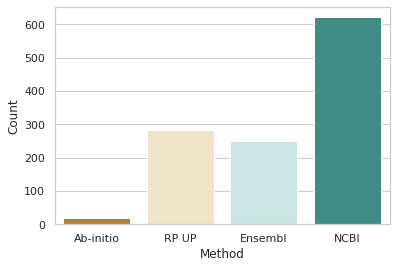

In [72]:
sns.barplot(data=uschogs, y='Count', x='Method', palette=mypaleta)

NameError: name 'kwargs' is not defined

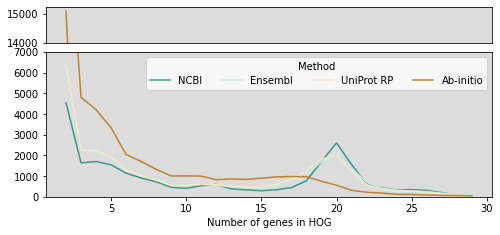

In [124]:
# Broken y axis:
# https://gist.github.com/pfandzelter/0ae861f0dee1fb4fd1d11344e3f85c9e
#  https://matplotlib.org/stable/gallery/subplots_axes_and_figures/broken_axis.html
sns.set_style(rc = {'axes.facecolor': 'gainsboro'})

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 3.5), gridspec_kw={'height_ratios': [1, 4]})
fig.subplots_adjust(hspace=0.1)  # adjust space between axe

ax1 = sns.histplot(hogprofiles, hue='Method', x='total_nb_genes', palette=mypaleta, element='poly', fill = False, discrete=True, ax=ax1)

ax2= sns.histplot(hogprofiles, hue='Method', x='total_nb_genes', palette=mypaleta, element='poly', fill = False, discrete=True, ax=ax2)

ax1.set_ylim((14000,15250))
ax2.set_ylim((0,7000))

ax1.get_xaxis().set_visible(False)

                
ax1.set_ylabel("")
ax2.set_ylabel("")

ax2.set(xlabel='Number of genes in HOG')

ax2.legend(title='Method', loc='best',ncol=4,labels=['NCBI', 'Ensembl', 'UniProt RP', 'Ab-initio'], facecolor='white')
ax1.get_legend().remove()



ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


sns.despine(ax=ax1, bottom= True)
sns.despine(ax=ax2)

#plt.savefig('HOGsize_distribution_poly_broken.png',bbox_inches='tight')

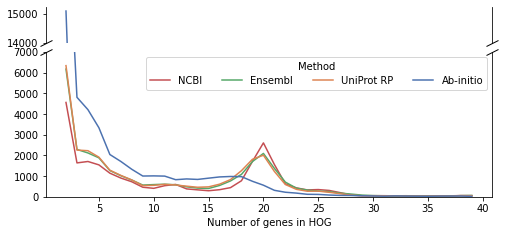

In [63]:
# Broken y axis:
# https://gist.github.com/pfandzelter/0ae861f0dee1fb4fd1d11344e3f85c9e
#  https://matplotlib.org/stable/gallery/subplots_axes_and_figures/broken_axis.html

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 3.5), gridspec_kw={'height_ratios': [1, 4]})
fig.subplots_adjust(hspace=0.1)  # adjust space between axe

ax1 = sns.histplot(hogprofiles, hue='Method', x='total_nb_genes', palette="deep", element='poly', fill = False, discrete=True, ax=ax1)

ax2= sns.histplot(hogprofiles, hue='Method', x='total_nb_genes', palette="deep", element='poly', fill = False, discrete=True, ax=ax2)

ax1.set_ylim((14000,15250))
ax2.set_ylim((0,7000))

ax1.get_xaxis().set_visible(False)

                
ax1.set_ylabel("")
ax2.set_ylabel("")

ax2.set(xlabel='Number of genes in HOG')

ax2.legend(title='Method', loc='best',ncol=4,labels=['NCBI', 'Ensembl', 'UniProt RP', 'Ab-initio'], facecolor='white')
ax1.get_legend().remove()



ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


sns.despine(ax=ax1, bottom=True, right=False)
sns.despine(ax=ax2, top=True, right=False)

#plt.savefig('HOGsize_distribution_poly_broken.png',bbox_inches='tight')

In [ ]:
x = list(range(0, 7001, 1000))
ax2.set_yticklabels(x,fontsize=8)
y = list(range(14000, 15001, 1000))
ax1.set_yticklabels(y, fontsize=8)

In [ ]:
d=.5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, 
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

In [5]:
from scipy.stats import bartlett

In [10]:
abin=hogprofiles[hogprofiles["Method"]=='OMAAugustus20']
refp=hogprofiles[hogprofiles["Method"]=='OMARP20']
ncbi=hogprofiles[hogprofiles["Method"]=='OMAtopNCBI20']
ensembl=hogprofiles[hogprofiles["Method"]=='OMAtopEnsembl20']

In [11]:
abinfreq = (abin['total_nb_genes'].value_counts()).to_frame().reset_index()
refpfreq = (refp['total_nb_genes'].value_counts()).to_frame().reset_index()
ncbifreq = (ncbi['total_nb_genes'].value_counts()).to_frame().reset_index()
ensemblfreq = (ensembl['total_nb_genes'].value_counts()).to_frame().reset_index()

abinfreq['Method']='Ab-initio'
refpfreq['Method']='RP UP'
ncbifreq['Method']='NCBI'
ensemblfreq['Method']='Ensembl'

freqtable=pd.concat([abinfreq, refpfreq, ncbifreq, ensemblfreq])

In [67]:
freqtable.loc[freqtable['total_nb_genes']==20]

,total_nb_genes,count,Method
18,20,560,Ab-initio
3,20,2008,RP UP
1,20,2603,NCBI
3,20,2094,Ensembl


In [21]:
## Actually i think this has no point here. It;s comparing the variances
bartlett(abin['total_nb_genes'], refp['total_nb_genes'], ncbi['total_nb_genes'], ensembl['total_nb_genes'])

BartlettResult(statistic=8478.292685548473, pvalue=0.0)

In [29]:
hog_profiles

,Group,CHICK,CHPIB,CIOIN,DANRE,ECNAU,ERCAL,FELCA,GADMO,HUMAN,...,ORANA,ORYLA,PHOSI,PODMU,SALTR,SARHA,TAEGU,XENTR,total_nb_genes,Method
0,HOG00001,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAtopEnsembl20
1,HOG00002,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAtopEnsembl20
2,HOG00003,0,0,0,0,8,0,0,0,0,...,0,7,0,0,0,0,0,0,15,OMAtopEnsembl20
3,HOG00004,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAtopEnsembl20
4,HOG00005,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAtopEnsembl20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30571,HOG30572,0,0,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,3,OMAtopEnsembl20
30572,HOG30573,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopEnsembl20
30573,HOG30574,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopEnsembl20
30574,HOG30575,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopEnsembl20


## HOG statistics

In [4]:
Measure=['HOG_count', 'mean','std', 'min', '25%', '50%', '75%', 'max']
HOGstats=pd.DataFrame(data=Measure, columns=['Measure'])
hog_profiles_total= pd.DataFrame()

for m in metfol:
    working_dir =  '/users/sprietob/mywork/' + m
    hog_profiles = pd.read_csv(working_dir + '/Output/PhyleticProfileHOGs.txt', skiprows=4, sep="\t")
    hog_profiles['total_nb_genes'] = hog_profiles.select_dtypes(include='number').sum(axis=1)
    
    tmp_series=hog_profiles['total_nb_genes'].describe()
    tmp_df=tmp_series.to_frame()
    current=tmp_df['total_nb_genes'].tolist()
    HOGstats[m]=current
    
    hog_profiles['Method']= m
    hog_profiles_total = pd.concat([hog_profiles_total, hog_profiles], ignore_index=True)

In [7]:
hog_profiles['total_nb_genes'].mean()

14.522153084938902

In [18]:
HOGstats

,Measure,OMAAugustus20,OMARP20,OMAtopEnsembl20,OMAtopNCBI20
0,HOG_count,45153.000000,30658.000000,30576.000000,26678.000000
1,mean,7.674064,12.281003,12.711310,14.522153
2,std,19.337774,18.713006,18.299504,47.656591
3,min,2.000000,2.000000,2.000000,2.000000
4,25%,2.000000,3.000000,3.000000,4.000000
5,50%,4.000000,8.000000,8.000000,11.000000
6,75%,10.000000,19.000000,19.000000,20.000000
7,max,1705.000000,1024.000000,883.000000,7052.000000


In [5]:
hog_profiles

,Group,CHICK,CHPIB,CIOIN,DANRE,ECNAU,ERCAL,FELCA,GADMO,HUMAN,...,ORANA,ORYLA,PHOSI,PODMU,SALTR,SARHA,TAEGU,XENTR,total_nb_genes,Method
0,HOG00001,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAtopNCBI20
1,HOG00002,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAtopNCBI20
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAtopNCBI20
3,HOG00004,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAtopNCBI20
4,HOG00005,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAtopNCBI20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26673,HOG26674,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopNCBI20
26674,HOG26675,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopNCBI20
26675,HOG26676,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopNCBI20
26676,HOG26677,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopNCBI20


In [8]:
HOGstats.to_csv('HOGstats.csv')

In [8]:
HOGstats_inv= HOGstats.transpose()
new_header = HOGstats_inv.iloc[0] #grab the first row for the header
HOGstats_inv = HOGstats_inv[1:] #take the data less the header row
HOGstats_inv.columns = new_header.to_list() #set the header row as the df header

HOGstats_inv = HOGstats_inv.reset_index()
HOGstats_inv=HOGstats_inv.rename(columns={"index": "Method"})

In [7]:
HOGstats_inv.to_csv('HOGstatsinv.csv')

In [5]:
HOGstats_inv=pd.read_csv('HOGstatsinv.csv')

In [22]:
import math
HOGstats_inv['sem'] = HOGstats_inv.apply(lambda row: row['std'] / math.sqrt(float(row['HOG_count'])), axis=1)

In [36]:
#fig, ax = plt.subplots(figsize=(8,8))

#sns.barplot(data=HOGstats_inv, y='Method', x='HOG_count')

<Axes: xlabel='50%', ylabel='Method'>

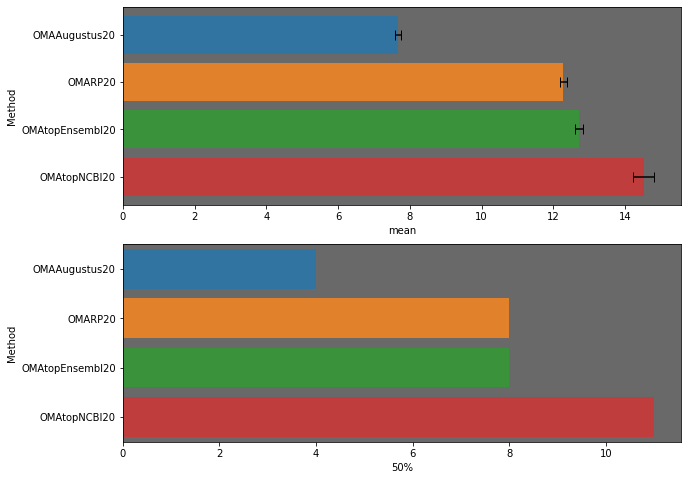

In [23]:
fig, ax = plt.subplots(2, figsize=(10,8))

HOGstats_inv['CI_Lower'] = HOGstats_inv['mean'] - HOGstats_inv['sem']
HOGstats_inv['CI_Upper'] = HOGstats_inv['mean'] + HOGstats_inv['sem']

sns.barplot(data=HOGstats_inv, y='Method', x='mean', errorbar=None, ax=ax[0])
ax[0].errorbar(data=HOGstats_inv, y='Method', x='mean', xerr=[HOGstats_inv['mean'] - HOGstats_inv['CI_Lower'], HOGstats_inv['CI_Upper']- HOGstats_inv['mean']],
             fmt='none', capsize=5, color='black')

sns.barplot(data=HOGstats_inv, y='Method', x='50%', ax=ax[1])

<ipython-input-10-684a005e52e2>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, ci=None)  # Disable Seaborn's default error bars


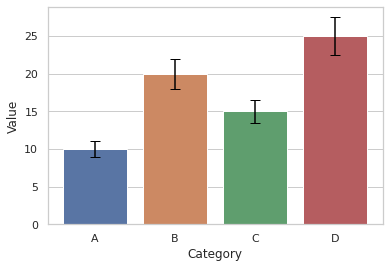

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create or load your DataFrame with values and errors
data = {
    'Category': ['A', 'B', 'C', 'D'],
    'Value': [10, 20, 15, 25],
    'Error': [1, 2, 1.5, 2.5]
}

df = pd.DataFrame(data)

# Calculate confidence intervals (upper and lower bounds)
df['CI_Lower'] = df['Value'] - df['Error']
df['CI_Upper'] = df['Value'] + df['Error']

# Create the barplot with error bars
sns.set(style="whitegrid")
sns.barplot(x='Category', y='Value', data=df, ci=None)  # Disable Seaborn's default error bars
plt.errorbar(x='Category', y='Value', yerr=[df['Value'] - df['CI_Lower'], df['CI_Upper'] - df['Value']], data=df, fmt='none', capsize=5, color='black')

# Show the plot
plt.show()


## HOG quality measures

Generate tables for the HOG quality measures, across the 6 different annotation methods.

In [10]:
from collections import Counter
from tqdm.auto import tqdm
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyham
import seaborn as sns

/users/sprietob/.local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
## Working directory for ancestral analysis:
awdir='/work/FAC/FBM/DBC/cdessim2/default/sprietob/HOGs/'

In [12]:
tree_fn = awdir+'species_tree_withname.nwk'

# want to load the orthoxml files and label according to the method
with open(awdir+'./orthoxml_files.txt', 'rt') as fp:
    oxml_fns = {}
    for fn in fp.readlines():
        # strip new line char
        fn = fn.rstrip()

        # get method
        method = fn.split('/')[-3]
        
        # save
        oxml_fns[method] = fn

In [13]:
hams = {method: 
        pyham.Ham(
            tree_file=tree_fn,
            tree_format="newick",
            hog_file=oxml_fn,
            type_hog_file="orthoxml",
            filter_object=None,
            use_internal_name=True,
            #with_parser_progress=True,
        )
        for (method, oxml_fn) in tqdm(oxml_fns.items())}

100%|██████████| 6/6 [01:44<00:00, 17.47s/it]


Now we need to generate the branch pairs. This can be done using the tree that pyham has already loaded using ete3.

In [14]:
def get_branch_pairs(t):
    for parent in t.iter_search_nodes():
        for child in parent.get_children():
            branch_type = 'internal' if len(child.get_children()) > 0 else 'terminal'
            yield (parent.name, child.name, branch_type)
            
for key in hams:  #Silvia added this part to obtain branches_df out of hams dictionary of hams
    ham=hams[key]
    branches_df = pd.DataFrame(get_branch_pairs(ham.taxonomy.tree), columns=['parent_node', 'child_node', 'branch_type'])

In [29]:
hams['OMAtopNCBI20'].top_level_hogs.items()

dict_items([('1', <HOG(1)>), ('2', <HOG(2)>), ('3', <HOG(3)>), ('4', <HOG(4)>), ('5', <HOG(5)>), ('6', <HOG(6)>), ('7', <HOG(7)>), ('8', <HOG(8)>), ('9', <HOG(9)>), ('10', <HOG(10)>), ('11', <HOG(11)>), ('12', <HOG(12)>), ('13', <HOG(13)>), ('14', <HOG(14)>), ('15', <HOG(15)>), ('16', <HOG(16)>), ('17', <HOG(17)>), ('18', <HOG(18)>), ('19', <HOG(19)>), ('20', <HOG(20)>), ('21', <HOG(21)>), ('22', <HOG(22)>), ('23', <HOG(23)>), ('24', <HOG(24)>), ('25', <HOG(25)>), ('26', <HOG(26)>), ('27', <HOG(27)>), ('28', <HOG(28)>), ('29', <HOG(29)>), ('30', <HOG(30)>), ('31', <HOG(31)>), ('32', <HOG(32)>), ('33', <HOG(33)>), ('34', <HOG(34)>), ('35', <HOG(35)>), ('36', <HOG(36)>), ('37', <HOG(37)>), ('38', <HOG(38)>), ('39', <HOG(39)>), ('40', <HOG(40)>), ('41', <HOG(41)>), ('42', <HOG(42)>), ('43', <HOG(43)>), ('44', <HOG(44)>), ('45', <HOG(45)>), ('46', <HOG(46)>), ('47', <HOG(47)>), ('48', <HOG(48)>), ('49', <HOG(49)>), ('50', <HOG(50)>), ('51', <HOG(51)>), ('52', <HOG(52)>), ('53', <HOG(53)>),

In [17]:
len(hams['OMAtopNCBI20'].top_level_hogs.items())

26678

We then want to compute the number of events per root level HOG. We do this by considering the events on every single branch and collating them by root HOG (top level gene family).
Now we can load the statistics of the gene sets / HOG quality measures

In [15]:
def get_stats(ham, branches_df):
    hog_qual = []
    for (hog_id, hog) in tqdm(ham.top_level_hogs.items()):
        x = hog.get_all_descendant_genes_clustered_by_species()
        n_sp_in_hog = len(x.keys())
        n_genes_in_hog = sum(1 for _ in itertools.chain.from_iterable(x.values()))
        n_sp_below_root_level = len(hog.genome.taxon.get_leaf_names())
        q = n_sp_in_hog / n_sp_below_root_level    ##This is the completeness_score
        hog_qual.append((hog_id, q, n_sp_below_root_level, n_sp_in_hog, n_genes_in_hog, hog.genome.name))

    df = pd.DataFrame(hog_qual, columns=['hog_id', 'completeness_score', 'n_species_below_root', 'n_species_observed', 'n_members', 'root_level'])

    # count implied losses
    implied_losses = Counter()
    duplication_events = Counter()
    stats = []
    for (branch_type, zdf) in branches_df.groupby('branch_type'):
        for (_, b) in zdf.iterrows():
            parent_genome = ham.get_ancestral_genome_by_name(b['parent_node'])
            if branch_type == 'internal':
                child_genome = ham.get_ancestral_genome_by_name(b['child_node'])
            else:
                child_genome = ham.get_extant_genome_by_name(b['child_node'])

            vmap = ham.compare_genomes_vertically(child_genome, parent_genome)

            # count the loss events per-family
            for g in vmap.get_lost():
                fam_id = int(g.get_top_level_hog().hog_id)
                implied_losses[fam_id] += 1

            # count the duplication events per-family
            for (g_p, g_c) in vmap.get_duplicated().items():
                fam_id = int(g_p.get_top_level_hog().hog_id)
                # number of duplication events
                duplication_events[fam_id] += (len(g_c) - 1)

            # also want to gather the statistics about the size of each of the sets
            x = {'parent_node': b['parent_node'],
                 'child_node': b['child_node'],
                 'retained_head': len(vmap.get_retained().values()),
                 'retained_tail': len(vmap.get_retained().keys()),
                 'gained': len(vmap.get_gained()),
                 'duplicated_head': len(list(itertools.chain.from_iterable(vmap.get_duplicated().values()))),
                 'duplicated_tail': len(vmap.get_duplicated().keys()),
                 'lost': len(vmap.get_lost()),
                 'parent_genome_size': len(parent_genome.genes),
                 'child_genome_size': len(child_genome.genes),
                 'branch_type': branch_type}
            stats.append(x)

    branch_stats = pd.DataFrame(stats)

    df['implied_losses'] = df['hog_id'].apply(lambda x: implied_losses[int(x)])
    df['duplication_events'] = df['hog_id'].apply(lambda x: duplication_events[int(x)])
    df['norm_losses'] = (df['implied_losses'] / df['n_members'])
    df['norm_loss_events'] = (df['implied_losses'] / df['n_species_below_root'])
    
    # losses + duplications
    df['n_events'] = df['implied_losses'] + df['duplication_events']
    
    # gather the ancestral genome sizes, as well.
    genes_in_hogs = {'ancestral': dict(map(lambda x: (x.name, len(x.genes)), ham.get_list_ancestral_genomes())),
                     'extant': dict(map(lambda x: (x.name, len(list(filter(lambda x: not x.is_singleton(), x.genes)))), ham.get_list_extant_genomes()))}
                    
    
    return {'branch_stats': branch_stats,
            'hog_stats': df,
            'genes_in_hogs': genes_in_hogs}

In [34]:
for (method, ham) in hams.items():
    for genome in ham.get_list_extant_genomes():
        if genome.name == 'CHICK': 
            print(method, genome.name, len(genome.genes))

OMAtopNCBI20 CHICK 49673
OMAprimNCBI20 CHICK 49673
OMAtopEnsembl20 CHICK 28444
OMAprimEnsembl20 CHICK 28444
OMARP20 CHICK 18112
OMAAugustus20 CHICK 18050


In [16]:
stats = {}
for (method, ham) in hams.items():
    stats[method] = get_stats(ham, branches_df)

100%|██████████| 45153/45153 [00:00<00:00, 47907.27it/s] 


In [17]:
stats

{'OMAtopNCBI20': {'branch_stats':           parent_node         child_node  retained_head  retained_tail  \
  0            Chordata       Euteleostomi           3912           3912   
  1        Euteleostomi          Tetrapoda          16124          16124   
  2        Euteleostomi     Actinopterygii          16337          16337   
  3           Tetrapoda            Amniota          17217          17217   
  4      Actinopterygii        Neopterygii          18620          18620   
  5             Amniota           Mammalia          17514          17514   
  6             Amniota             Sauria          17747          17747   
  7         Neopterygii      Clupeocephala          19184          19184   
  8            Mammalia             Theria          18159          18159   
  9              Sauria      Archelosauria          17946          17946   
  10      Clupeocephala  Euteleosteomorpha          20415          20415   
  11             Theria      Boreoeutheria          1809

## Number of genes in HOGs

In [36]:
def get_hogmembership_distn(stats):
    def get():
        for (method, method_stats) in stats.items():
            yield from zip(itertools.repeat(method),
                           itertools.repeat('Ancestral'),
                           method_stats['genes_in_hogs']['ancestral'].values())
            yield from zip(itertools.repeat(method),
                           itertools.repeat('Extant'),
                           method_stats['genes_in_hogs']['extant'].values())
    return pd.DataFrame(get(), columns=['Method', 'Branch Type', 'No. genes present in HOGs'])

In [37]:
in_hog_distn = get_hogmembership_distn(stats)

In [21]:
in_hog_distn

,Method,Branch Type,No. genes present in HOGs
0,OMAtopNCBI20,Ancestral,19597
1,OMAtopNCBI20,Ancestral,19453
2,OMAtopNCBI20,Ancestral,19856
3,OMAtopNCBI20,Ancestral,19395
4,OMAtopNCBI20,Ancestral,16702
...,...,...,...
229,OMAAugustus20,Extant,34134
230,OMAAugustus20,Extant,18213
231,OMAAugustus20,Extant,15089
232,OMAAugustus20,Extant,13992


<Axes: xlabel='No. genes present in HOGs', ylabel='Branch Type'>

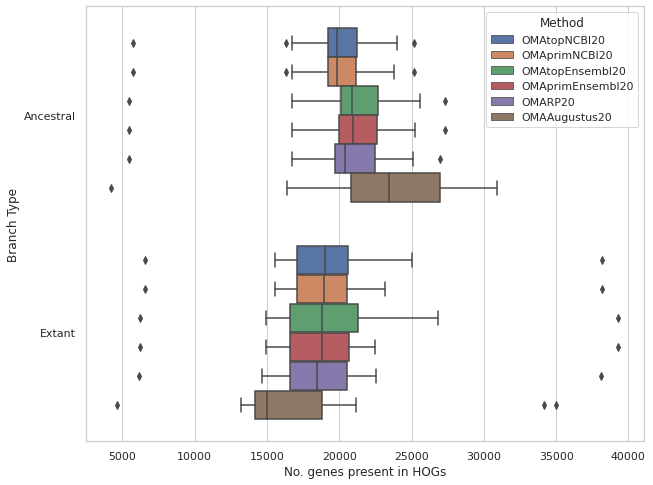

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(in_hog_distn, x='No. genes present in HOGs', y='Branch Type', hue='Method')

In [38]:
in_hog_plot= pd.DataFrame()
for m in metfol:
    in_hog_tmp = in_hog_distn.loc[in_hog_distn["Method"]== m]
    in_hog_plot= pd.concat([in_hog_plot, in_hog_tmp], ignore_index=True)

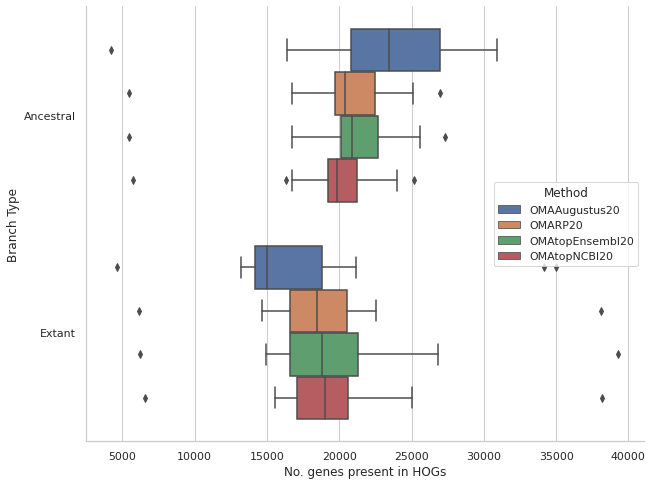

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(in_hog_plot, x='No. genes present in HOGs', y='Branch Type', hue='Method')
sns.despine()

In [23]:
in_hog_anc_plot= in_hog_plot.loc[in_hog_plot["Branch Type"]=='Ancestral']
in_hog_ext_plot=in_hog_plot.loc[in_hog_plot["Branch Type"]=='Extant']

In [24]:
in_hog_anc_plot.loc[in_hog_anc_plot['Method']=='OMAtopNCBI20']

,Method,Branch Type,No. genes present in HOGs
117,OMAtopNCBI20,Ancestral,19597
118,OMAtopNCBI20,Ancestral,19453
119,OMAtopNCBI20,Ancestral,19856
120,OMAtopNCBI20,Ancestral,19395
121,OMAtopNCBI20,Ancestral,16702
122,OMAtopNCBI20,Ancestral,16296
123,OMAtopNCBI20,Ancestral,20810
124,OMAtopNCBI20,Ancestral,22013
125,OMAtopNCBI20,Ancestral,20238
126,OMAtopNCBI20,Ancestral,25189


In [25]:
ext_hogs_descr=pd.DataFrame()
for m in metfol:
    tmp_df=in_hog_ext_plot.loc[in_hog_ext_plot['Method']==m]
    ext_hogs_descr[m]=tmp_df.describe()['No. genes present in HOGs']
    ext_hogs_descr[m]

In [30]:
ext_hogs_descr.transpose()

,count,mean,std,min,25%,50%,75%,max
OMAAugustus20,20.0,17325.35,6797.009554,4660.0,14207.25,14987.5,18816.50,34969.0
OMARP20,20.0,18825.55,5725.142549,6182.0,16613.50,18450.5,20533.00,38076.0
OMAtopEnsembl20,20.0,19433.05,6192.283955,6194.0,16570.25,18792.5,21328.75,39311.0
OMAtopNCBI20,20.0,19371.10,5676.373118,6554.0,17103.75,18991.5,20596.75,38200.0


In [26]:
anc_hogs_descr=pd.DataFrame()
for m in metfol:
    tmp_df=in_hog_anc_plot.loc[in_hog_anc_plot['Method']==m]
    anc_hogs_descr[m]=tmp_df.describe()['No. genes present in HOGs']

In [31]:
anc_hogs_descr.transpose()

,count,mean,std,min,25%,50%,75%,max
OMAAugustus20,19.0,22971.315789,6019.015285,4228.0,20821.5,23449.0,26977.0,30881.0
OMARP20,19.0,20467.368421,4384.690844,5428.0,19702.0,20396.0,22450.0,26967.0
OMAtopEnsembl20,19.0,20697.684211,4462.545114,5465.0,20125.5,20885.0,22683.0,27316.0
OMAtopNCBI20,19.0,19528.894737,3984.439984,5714.0,19256.5,19856.0,21202.0,25189.0


## HOG completeness distribution

In [20]:
def get_hogcompletness_distn(stats):
    def get():
        for (method, method_stats) in stats.items():
            yield from zip(itertools.repeat(method),
                           method_stats['hog_stats'].completeness_score)
            
    return pd.DataFrame(get(), columns=['Method', 'HOG Completeness Score'])

In [21]:
hogcompleteness = get_hogcompletness_distn(stats)

In [8]:
hogcompleteness

NameError: name 'hogcompleteness' is not defined

In [26]:
stcompleteness=pd.DataFrame()
for m in metfol:
    tmp_df=hogcompleteness.loc[hogcompleteness['Method']==m]
    stcompleteness[m]=tmp_df.describe()['HOG Completeness Score']

In [29]:
stcompleteness

,OMAAugustus20,OMARP20,OMAtopNCBI20,OMAtopEnsembl20
count,45153.000000,30658.000000,26678.000000,30576.000000
mean,0.559084,0.714073,0.770784,0.712381
std,0.295619,0.297238,0.292027,0.301499
min,0.100000,0.100000,0.100000,0.100000
25%,0.315789,0.500000,0.545455,0.473684
50%,0.500000,0.833333,0.947368,0.833333
75%,0.818182,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Distribution of HOG completeness Score per root-HOG')

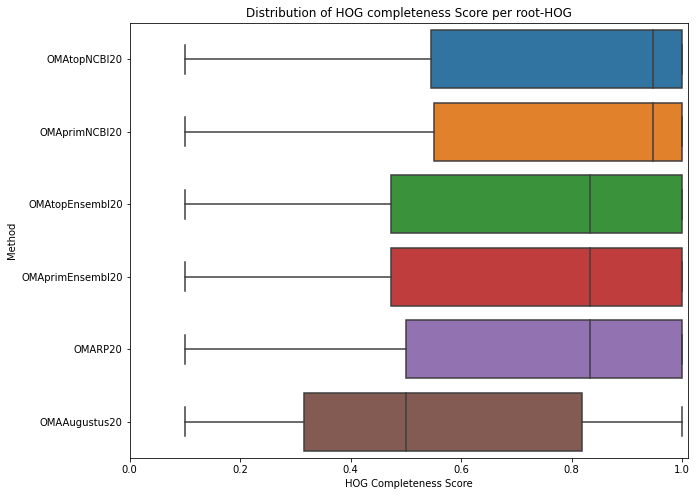

In [27]:
fig , ax = plt.subplots(figsize=(10,8))
ax = sns.boxplot(data=hogcompleteness, x='HOG Completeness Score', y='Method')
ax.set_xlim((0.00,1.01))

plt.title('Distribution of HOG completeness Score per root-HOG')

In [22]:
hogcompleteness_plot= pd.DataFrame()
for m in metfol:
    hogcompleteness_tmp = hogcompleteness.loc[hogcompleteness["Method"]== m]
    hogcompleteness_plot= pd.concat([hogcompleteness_plot, hogcompleteness_tmp], ignore_index=True)

Text(0.5, 1.0, 'Distribution of HOG completeness Score per root-HOG')

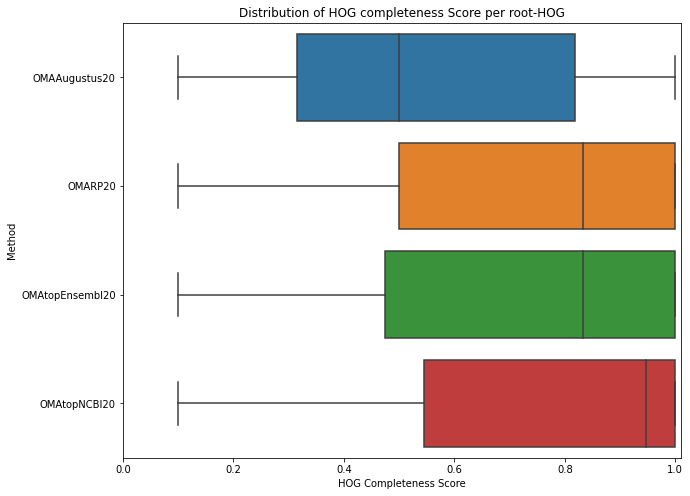

In [29]:
fig , ax = plt.subplots(figsize=(10,8))
ax = sns.boxplot(data=hogcompleteness_plot, x='HOG Completeness Score', y='Method')
ax.set_xlim((0.00,1.01))

plt.title('Distribution of HOG completeness Score per root-HOG')

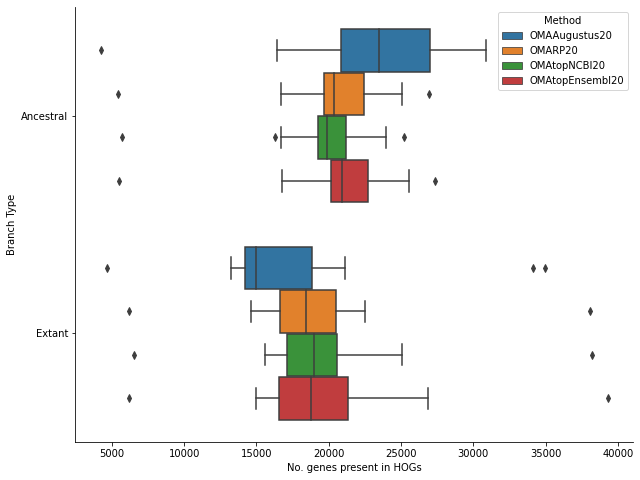

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(in_hog_plot, x='No. genes present in HOGs', y='Branch Type', hue='Method')
sns.despine()

In [41]:
methodsrename=pd.DataFrame({'Software': ['OMAAugustus20', 'OMARP20', 'OMAprimEnsembl20','OMAtopEnsembl20','OMAprimNCBI20','OMAtopNCBI20'], 
                           'Method':['Ab-initio', 'RP UP', 'primEnsembl', 'Ensembl','primNCBI', 'NCBI']})
HOGstats_inv['Method']= HOGstats_inv['Method'].map(methodsrename.set_index('Software')['Method'])


In [42]:
#in_hog_ext_plot['Method']= in_hog_ext_plot['Method'].map(methodsrename.set_index('Software')['Method'])
#in_hog_anc_plot['Method']= in_hog_anc_plot['Method'].map(methodsrename.set_index('Software')['Method'])
hogcompleteness_plot['Method']= hogcompleteness_plot['Method'].map(methodsrename.set_index('Software')['Method'])

In [113]:
#in_hog_ext_plot.rename(columns = {'No. genes present in HOGs':'No. genes present in HOGs in extant species'}, inplace = True)
#in_hog_anc_plot.rename(columns = {'No. genes present in HOGs':'No. genes present in HOGs in ancestral species'}, inplace = True)

<ipython-input-113-45cdba2f77ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_hog_ext_plot.rename(columns = {'No. genes present in HOGs':'No. genes present in HOGs in extant species'}, inplace = True)


In [32]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [33]:
mypaleta=['#BF812D', '#F6E8C3', '#C7EAE5','#35978F']

In [88]:
in_hog_ext_plot

,Method,Branch Type,No. genes present in HOGs
19,OMAAugustus20,Extant,13220
20,OMAAugustus20,Extant,18863
21,OMAAugustus20,Extant,14369
22,OMAAugustus20,Extant,14025
23,OMAAugustus20,Extant,14499
24,OMAAugustus20,Extant,34969
25,OMAAugustus20,Extant,14886
26,OMAAugustus20,Extant,14760
27,OMAAugustus20,Extant,18801
28,OMAAugustus20,Extant,19711


In [29]:
in_hog_anc_plot2=in_hog_anc_plot

In [70]:
set(in_hog_anc_plot['Method'])

{'Ab-initio', 'Ensembl', 'NCBI', 'Reference proteomes UniProt'}

In [30]:
methodsrename=pd.DataFrame({'Software': ['OMAAugustus20', 'OMARP20', 'OMAtopEnsembl20','OMAtopNCBI20'], 
                           'Method':['Ab-initio', 'Reference proteomes UniProt', 'Ensembl', 'NCBI']})
in_hog_anc_plot2['Method']= in_hog_anc_plot2['Method'].map(methodsrename.set_index('Software')['Method'])

<ipython-input-30-cc1c0ae56083>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_hog_anc_plot2['Method']= in_hog_anc_plot2['Method'].map(methodsrename.set_index('Software')['Method'])


In [51]:
stats2=pd.read_csv('ProtLengthStats_canonical_4methods.csv')
extotalgenes=stats2.loc[:, ["Method", "count"]]
extotalgenes['Branch Type']='Extant'

In [52]:
new_names = {'count': 'Number of genes'}
extotalgenes.rename(columns=new_names, inplace=True)

In [53]:
new_order=['Method', 'Branch Type', 'Number of genes']
extotalgenes=extotalgenes[new_order]

In [56]:
new_name={'No. genes present in HOGs': 'Number of genes'}
in_hog_anc_plot2=in_hog_anc_plot2.rename(columns=new_name)

In [35]:
gene_numbers=pd.concat([in_hog_anc_plot2, extotalgenes])

In [83]:
abin_ext=extotalgenes[extotalgenes['Method']=='Ab-initio']
abin_anc=in_hog_anc_plot2[in_hog_anc_plot2['Method']=='Ab-initio']
up_ext=extotalgenes[extotalgenes['Method']=='Reference proteomes UniProt']
up_anc=in_hog_anc_plot2[in_hog_anc_plot2['Method']=='Reference proteomes UniProt']
ens_ext=extotalgenes[extotalgenes['Method']=='Ensembl']
ens_anc=in_hog_anc_plot2[in_hog_anc_plot2['Method']=='Ensembl']
ncbi_ext=extotalgenes[extotalgenes['Method']=='NCBI']
ncbi_anc=in_hog_anc_plot2[in_hog_anc_plot2['Method']=='NCBI']

In [106]:
from scipy import stats

ks_stat = stats.ks_2samp(abin_ext['Number of genes'], abin_anc['Number of genes'], alternative='two-sided')
ks_stat[0]

0.4

In [100]:
ks_stat = stats.ks_2samp(up_ext['Number of genes'], up_anc['Number of genes'], alternative='greater')
ks_stat

KstestResult(statistic=0.24210526315789474, pvalue=0.25398110566655324, statistic_location=19171.0, statistic_sign=1)

In [101]:
ks_stat = stats.ks_2samp(ens_ext['Number of genes'], ens_anc['Number of genes'], alternative='greater')
ks_stat

KstestResult(statistic=0.29210526315789476, pvalue=0.14120201795880086, statistic_location=19588.0, statistic_sign=1)

In [102]:
ks_stat = stats.ks_2samp(ncbi_ext['Number of genes'], ncbi_anc['Number of genes'], alternative='greater')
ks_stat

KstestResult(statistic=0.1394736842105263, pvalue=0.6129112891215711, statistic_location=19069.0, statistic_sign=1)

In [38]:
hogprofilesplot

,Group,CHICK,CHPIB,CIOIN,DANRE,ECNAU,ERCAL,FELCA,GADMO,HUMAN,...,ORANA,ORYLA,PHOSI,PODMU,SALTR,SARHA,TAEGU,XENTR,total_nb_genes,Method
0,HOG00001,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,Ab-initio
1,HOG00002,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,Ab-initio
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,Ab-initio
3,HOG00004,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,Ab-initio
4,HOG00005,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,Ab-initio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133060,HOG26674,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,NCBI
133061,HOG26675,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,NCBI
133062,HOG26676,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,NCBI
133063,HOG26677,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,NCBI


In [37]:
methodsrename=pd.DataFrame({'Software': ['OMAAugustus20', 'OMARP20', 'OMAtopEnsembl20','OMAtopNCBI20'], 
                           'Method':['Ab-initio', 'UniProt', 'Ensembl', 'NCBI']})
hogprofilesplot['Method']= hogprofilesplot['Method'].map(methodsrename.set_index('Software')['Method'])

### HOGs quality figure version 1

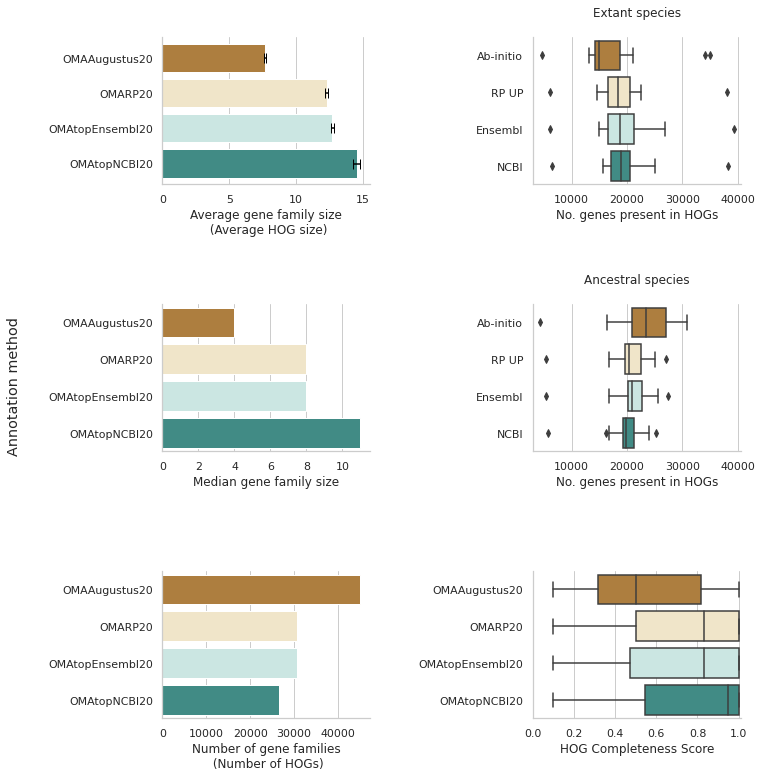

In [95]:
fig , ((ax1, ax2), (ax3, ax4), (ax5, ax6))= plt.subplots(nrows= 3, ncols=2, figsize=(12,12))

#HOGstats_inv['CI_Lower'] = HOGstats_inv['mean'] - HOGstats_inv['sem']
#HOGstats_inv['CI_Upper'] = HOGstats_inv['mean'] + HOGstats_inv['sem']

#ax1 = avg gene family (HOG) size
ax1 = sns.barplot(data=HOGstats_inv, y='Method', x='mean', errorbar=None, ax=ax1, palette= mypaleta)
ax1.errorbar(data=HOGstats_inv, y='Method', x='mean', xerr=[HOGstats_inv['mean'] - HOGstats_inv['CI_Lower'], HOGstats_inv['CI_Upper']- HOGstats_inv['mean']],
             fmt='none', capsize=5, color='black')

#ax2: extant species genes per hog
ax2= sns.boxplot(in_hog_ext_plot, x='No. genes present in HOGs', y='Method', ax=ax2, palette='BrBG')


# AX3: median gene family size
ax3 = sns.barplot(data=HOGstats_inv, y='Method', x='50%', ax=ax3, palette=mypaleta)


#ax4: ancestral species genes per hog
ax4= sns.boxplot(in_hog_anc_plot, x='No. genes present in HOGs', y='Method', ax=ax4, palette='BrBG')

#ax5: n of HOGs
ax5= sns.barplot(data=HOGstats_inv, y='Method', x='HOG_count', ax=ax5, palette=mypaleta)


# ax6 HOG completeness
ax6= sns.boxplot(data=hogcompleteness_plot, x='HOG Completeness Score', y='Method', ax=ax6, palette='BrBG')


ax2.set_xlim((3000,40500))
ax4.set_xlim((3000, 40500))
ax6.set_xlim((0.00,1.01))
sns.despine()

ax1.set_xlabel('Average gene family size\n (Average HOG size)')
ax3.set_xlabel('Median gene family size')
ax5.set_xlabel('Number of gene families\n (Number of HOGs)')

ax2.locator_params(axis='both', nbins=4)
ax4.locator_params(axis='both', nbins=4)

ax2.set_yticklabels(('Ab-initio', 'RP UP', 'Ensembl', 'NCBI'))
ax4.set_yticklabels(('Ab-initio', 'RP UP', 'Ensembl', 'NCBI'))

ax1.set(ylabel=None)
ax2.set(ylabel=None)
ax3.set(ylabel=None)
ax4.set(ylabel=None)
ax5.set(ylabel=None)
ax6.set(ylabel=None)

fig.supylabel('Annotation method', x= 0.08)


ax2.set_title('Extant species', y=1.1)
ax4.set_title('Ancestral species', y= 1.1)
plt.tight_layout(pad=4)

plt.savefig('HOG_stats3.png',bbox_inches='tight')

In [43]:
mypaleta=['#BF812D', '#F6E8C3', '#C7EAE5', '#35978F']
ancext=["#8F3931FF", "lightcoral"]

In [44]:
import matplotlib as mpl

### HOGs quality figure version 2

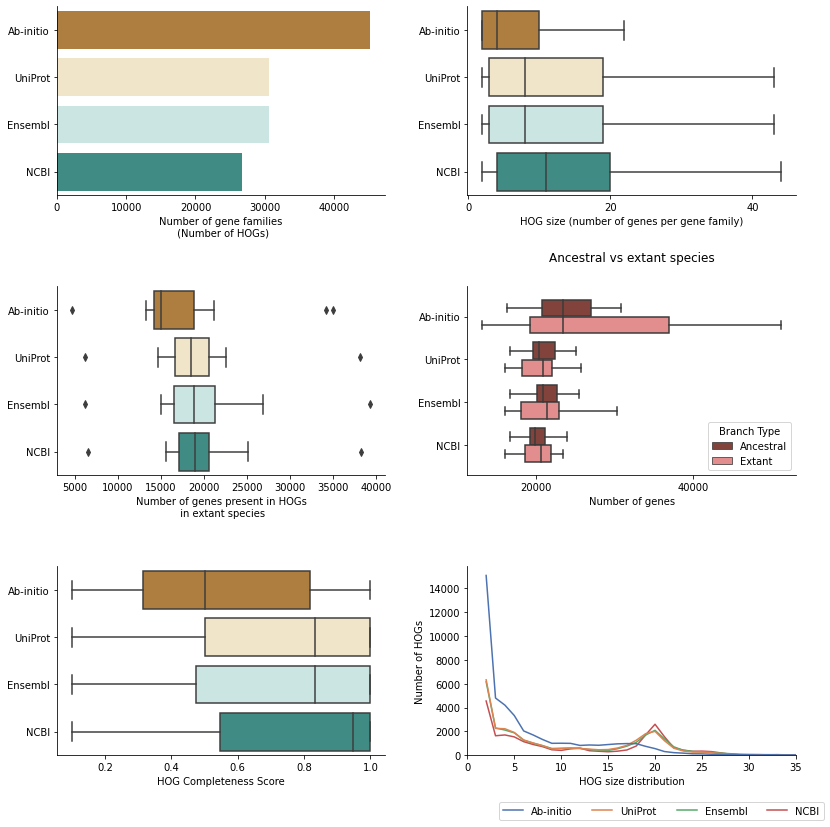

In [47]:
fig , ((ax1, ax2), (ax3, ax4), (ax5, ax6))= plt.subplots(nrows= 3, ncols=2, figsize=(12,12))

#HOGstats_inv['CI_Lower'] = HOGstats_inv['mean'] - HOGstats_inv['sem']
#HOGstats_inv['CI_Upper'] = HOGstats_inv['mean'] + HOGstats_inv['sem']

#ax1 = Number of HOGs
ax1 = sns.barplot(data=HOGstats_inv, y='Method', x='HOG_count', ax=ax1, palette=mypaleta)

#ax2: HOG size distribution
ax2= sns.boxplot(data=hogprofilesplot, y='Method', x='total_nb_genes', ax=ax2, palette= mypaleta, showfliers=False)


# AX3: number of genes in HOGs in extant species
ax3 = sns.boxplot(in_hog_ext_plot, x='No. genes present in HOGs', y='Method', ax=ax3, palette='BrBG')


#ax4: ancestral vs extant species number of genes
ax4= sns.boxplot(gene_numbers, x='Number of genes', y='Method', hue='Branch Type', ax=ax4, palette=ancext, showfliers=False)

#ax5: n of HOGs
ax5=  sns.boxplot(data=hogcompleteness_plot, x='HOG Completeness Score', y='Method', ax=ax5, palette='BrBG')


# ax6 HOG completeness
ax6= sns.histplot(hogprofilesplot, hue='Method', x='total_nb_genes', palette="deep", element='poly', 
                  fill = False, discrete=True, ax=ax6)


#ax2.set_xlim((0,35))
#ax4.set_xlim((3000, 60000))
ax6.set_xlim((0, 35))
sns.despine()

ax1.set_xlabel('Number of gene families\n (Number of HOGs)')
ax2.set_xlabel('HOG size (number of genes per gene family)')
ax3.set_xlabel('Number of genes present in HOGs\n in extant species')
ax6.set_xlabel('HOG size distribution')

ax2.locator_params(axis='both', nbins=4)
ax4.locator_params(axis='both', nbins=4)

ax1.set_yticklabels(('Ab-initio', 'UniProt', 'Ensembl', 'NCBI'))
ax2.set_yticklabels(('Ab-initio', 'UniProt', 'Ensembl', 'NCBI'))
ax3.set_yticklabels(('Ab-initio', 'UniProt', 'Ensembl', 'NCBI'))
ax4.set_yticklabels(('Ab-initio', 'UniProt', 'Ensembl', 'NCBI'))
ax5.set_yticklabels(('Ab-initio', 'UniProt', 'Ensembl', 'NCBI'))

legend = ax6.get_legend()
handles = legend.legend_handles
legend.remove()
ax6.legend(handles, ['Ab-initio', 'UniProt', 'Ensembl', 'NCBI'], bbox_to_anchor=(1.1, -0.22), ncol=4)

ax1.set(ylabel=None)
ax2.set(ylabel=None)
ax3.set(ylabel=None)
ax4.set(ylabel=None)
ax5.set(ylabel=None)
ax6.set(ylabel='Number of HOGs')

#fig.supylabel('Annotation method', x= 0.03, fontsize=14)



ax4.set_title('Ancestral vs extant species', y= 1.1)
plt.tight_layout(pad=2.5)

#plt.savefig('HOG_stats3_tmp.png',bbox_inches='tight')

In [84]:
hogprofilesplot

,Group,CHICK,CHPIB,CIOIN,DANRE,ECNAU,ERCAL,FELCA,GADMO,HUMAN,...,ORANA,ORYLA,PHOSI,PODMU,SALTR,SARHA,TAEGU,XENTR,total_nb_genes,Method
0,HOG00001,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
1,HOG00002,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
3,HOG00004,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
4,HOG00005,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133060,HOG26674,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopNCBI20
133061,HOG26675,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopNCBI20
133062,HOG26676,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopNCBI20
133063,HOG26677,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopNCBI20


In [96]:
hogcompleteness_plot

,Method,HOG Completeness Score
0,Ab initio,1.0
1,Ab initio,1.0
2,Ab initio,1.0
3,Ab initio,1.0
4,Ab initio,1.0
...,...,...
133060,OMAtopNCBI20,0.1
133061,OMAtopNCBI20,0.1
133062,OMAtopNCBI20,0.1
133063,OMAtopNCBI20,0.1


In [97]:
hogcompleteness_plot['Method'] =hogcompleteness_plot['Method'].replace('OMAAugustus20', 'Ab initio')
hogcompleteness_plot['Method'] =hogcompleteness_plot['Method'].replace('OMAtopNCBI20', 'NCBI')
hogcompleteness_plot['Method'] =hogcompleteness_plot['Method'].replace('OMARP20', 'UniProt')
hogcompleteness_plot['Method'] =hogcompleteness_plot['Method'].replace('OMAtopEnsembl20', 'Ensembl')

## Reduced version

In [24]:
import matplotlib.ticker as ticker 

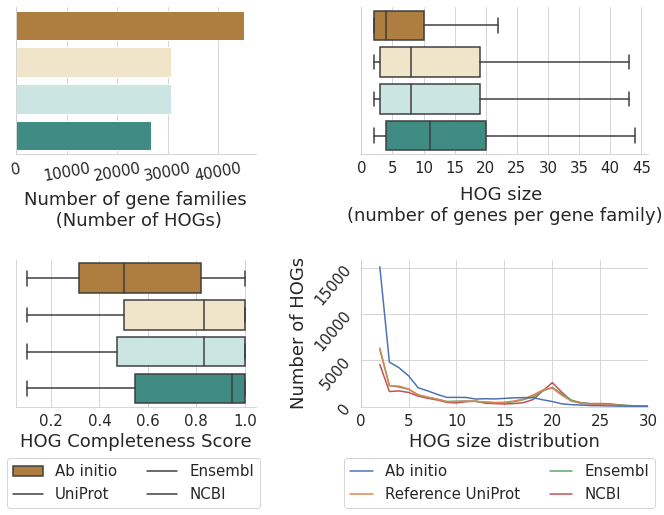

In [115]:
sns.set_style("whitegrid")

width_ratios = [1, 1.2]
fig , ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows= 2, ncols=2, 
                                             figsize=(10,8),gridspec_kw={'width_ratios': width_ratios})

#ax1 = Number of HOGs
ax1 = sns.barplot(data=HOGstats_inv, y='Method', x='HOG_count', ax=ax1, palette=mypaleta)

#ax2: HOG size distribution
ax2= sns.boxplot(data=hogprofilesplot, y='Method', x='total_nb_genes', ax=ax2, palette= mypaleta, showfliers=False)


#ax5: n of HOGs
ax3=sns.boxplot(data=hogcompleteness_plot, x='HOG Completeness Score', y='Method', ax=ax3, palette='BrBG')


# ax6 HOG completeness
ax4=sns.histplot(hogprofilesplot, hue='Method', x='total_nb_genes', palette="deep", element='poly', 
                  fill = False, discrete=True, ax=ax4)


#ax2.set_xlim((0,35))
#ax4.set_xlim((3000, 60000))
ax4.set_xlim((0, 30))
sns.despine()

ax1.set_xlabel('Number of gene families\n (Number of HOGs)', fontsize=18, labelpad=7)
ax2.set_xlabel('HOG size \n(number of genes per gene family)', fontsize=18, labelpad=10)
ax3.set_xlabel('HOG Completeness Score', fontsize=18)
ax4.set_xlabel('HOG size distribution', fontsize=18)

ax2.locator_params(axis='both', nbins=4)


ax1.tick_params(axis='x', labelsize=15, rotation=10)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(5)) 
ax2.tick_params(axis='x', labelsize=15)
ax3.tick_params(axis='x', labelsize=15)

ax4.xaxis.set_major_locator(ticker.MultipleLocator(5)) 
ax4.tick_params(axis='x', labelsize=15)

ax1.set_yticklabels('')
ax2.set_yticklabels('')
ax3.set_yticklabels('')

ax4.tick_params(axis='y', labelsize=15, rotation=50)

method_labels = ['Ab initio', 'UniProt', 'NCBI', 'Ensembl']
ax3.legend(labels=hogcompleteness_plot['Method'].unique(), 
           bbox_to_anchor=(1.05, -0.3), fontsize=15, ncols=2)

legend = ax4.get_legend()
handles = legend.legend_handles
legend.remove()
ax4.legend(handles, ['Ab initio', 'Reference UniProt', 'Ensembl', 'NCBI'], 
           bbox_to_anchor=(1.05, -0.3), ncol=2, fontsize=15, handlelength=1.5)

ax1.set(ylabel=None)
ax2.set(ylabel=None)
ax3.set(ylabel=None)
ax4.set_ylabel('Number of HOGs', fontsize=18)

#fig.supylabel('Annotation method', x= 0.03, fontsize=14)


plt.tight_layout(pad=3)
plt.savefig('HOG_stats3_reduced.png',bbox_inches='tight')

In [ ]:
gene_numbers=pd.concat([in_hog_anc_plot2, extotalgenes])

### No cutoff/ yes fliers supplementary


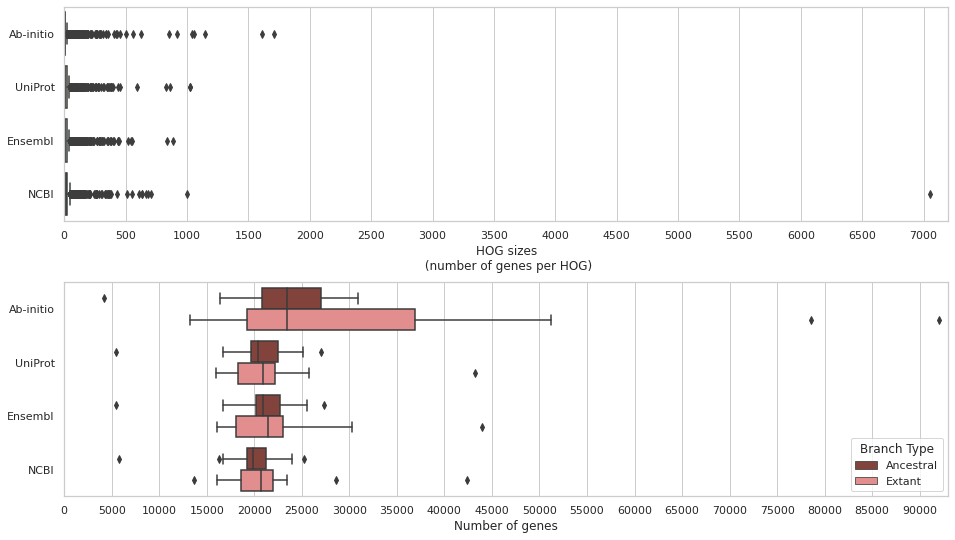

In [179]:
fig ,(ax1, ax2)= plt.subplots(nrows= 2, ncols=1, figsize=(14,8))

ax1= sns.boxplot(data=hogprofilesplot, y='Method', x='total_nb_genes', ax=ax1, palette= mypaleta)
ax2= sns.boxplot(gene_numbers, x='Number of genes', y='Method', hue='Branch Type', ax=ax2, palette=ancext)

ax2.set_yticklabels(('Ab-initio', 'UniProt', 'Ensembl', 'NCBI'))

plt.tight_layout(pad=2.5)

ax1.set_xlim((0,7200))
ax1.xaxis.set_ticks(np.arange(0, 7500, 500))
ax2.set_xlim((0,93000))
ax2.xaxis.set_ticks(np.arange(0, 95000, 5000))

ax1.set(ylabel='')
ax2.set(ylabel='')

ax1.set(xlabel= 'HOG sizes\n (number of genes per HOG)')

plt.savefig('HOGfigsWITHFliers.png')

In [ ]:
ax6= sns.histplot(hogprofilesplot, hue='Method', x='total_nb_genes', palette="deep", element='poly', 
                  fill = False, discrete=True, ax=ax6)

In [ ]:
# select the correct patches
patches = [patch for patch in ax4.patches if type(patch) == mpl.patches.PathPatch]
# the number of patches should be evenly divisible by the number of hatches
h = hatches * (len(patches) // len(hatches))
# iterate through the patches for each subplot
for patch, hatch in zip(patches, h):
    patch.set_hatch(hatch)
    fc = patch.get_facecolor()
    patch.set_edgecolor(fc)
    patch.set_facecolor('none')

l = ax4.legend()
    
for lp, hatch in zip(l.get_patches(), hatches):
    lp.set_hatch(hatch)
    fc = lp.get_facecolor()
    lp.set_edgecolor(fc)
    lp.set_facecolor('none')

## HOGs number of genes peak in 20. Investigation

In [ ]:
NCBIHOGs=stats['OMAtopNCBI20']['hog_stats']

In [36]:
peakhogs=NCBIHOGs[NCBIHOGs['n_members']>14]
peakhogs.reset_index().drop(columns='index')

,hog_id,completeness_score,n_species_below_root,n_species_observed,n_members,root_level,implied_losses,duplication_events,norm_losses,norm_loss_events,n_events
0,166,1.000000,2,2,28,Percomorphaceae,0,26,0.000000,0.000000,26
1,725,0.666667,3,2,15,Acanthomorphata,1,13,0.066667,0.333333,14
2,755,1.000000,4,4,15,Euteleosteomorpha,0,7,0.000000,0.000000,7
3,773,1.000000,4,4,25,Euteleosteomorpha,3,19,0.120000,0.750000,22
4,774,0.750000,4,3,29,Euteleosteomorpha,10,26,0.344828,2.500000,36
...,...,...,...,...,...,...,...,...,...,...,...
11738,26511,0.750000,20,15,15,Chordata,2,0,0.133333,0.100000,2
11739,26514,0.650000,20,13,57,Chordata,11,32,0.192982,0.550000,43
11740,26517,0.400000,20,8,18,Chordata,12,9,0.666667,0.600000,21
11741,26518,0.650000,20,13,16,Chordata,3,2,0.187500,0.150000,5


In [32]:
stats

{'OMAtopNCBI20': {'branch_stats':           parent_node         child_node  retained_head  retained_tail  \
  0            Chordata       Euteleostomi           3912           3912   
  1        Euteleostomi          Tetrapoda          16124          16124   
  2        Euteleostomi     Actinopterygii          16337          16337   
  3           Tetrapoda            Amniota          17217          17217   
  4      Actinopterygii        Neopterygii          18620          18620   
  5             Amniota           Mammalia          17514          17514   
  6             Amniota             Sauria          17747          17747   
  7         Neopterygii      Clupeocephala          19184          19184   
  8            Mammalia             Theria          18159          18159   
  9              Sauria      Archelosauria          17946          17946   
  10      Clupeocephala  Euteleosteomorpha          20415          20415   
  11             Theria      Boreoeutheria          1809

## Gene length - HOG completeness score investigatione

In [38]:
badqual=NCBIHOGs[NCBIHOGs['completeness_score']<0.31]
badqual.reset_index().drop(columns='index')

,hog_id,completeness_score,n_species_below_root,n_species_observed,n_members,root_level,implied_losses,duplication_events,norm_losses,norm_loss_events,n_events
0,4319,0.285714,7,2,2,Actinopterygii,1,0,0.5,0.142857,1
1,4320,0.285714,7,2,2,Actinopterygii,1,0,0.5,0.142857,1
2,4329,0.285714,7,2,2,Actinopterygii,1,0,0.5,0.142857,1
3,4334,0.285714,7,2,2,Actinopterygii,1,0,0.5,0.142857,1
4,4338,0.285714,7,2,2,Actinopterygii,1,0,0.5,0.142857,1
...,...,...,...,...,...,...,...,...,...,...,...
3001,26674,0.100000,20,2,2,Chordata,7,0,3.5,0.350000,7
3002,26675,0.100000,20,2,2,Chordata,7,0,3.5,0.350000,7
3003,26676,0.100000,20,2,2,Chordata,7,0,3.5,0.350000,7
3004,26677,0.100000,20,2,2,Chordata,7,0,3.5,0.350000,7


Need to automatically extract the protein IDs from the bad qual HOGs

In [39]:
genelength2=pd.read_csv('CanonicalProteinsLength_3_correction.csv')

In [42]:
genelength=[]
protsinHOG= ['XP_028646106.1', 'XP_015195523.1']
for proteinid in protsinHOG:
    print(genelength2[genelength2['Protein']== proteinid])

         Unnamed: 0         Method Species         Protein  Length
1241393     1241393  OMAprimNCBI20   ERCAL  XP_028646106.1     177
1667917     1667917   OMAtopNCBI20   ERCAL  XP_028646106.1     177
         Unnamed: 0         Method Species         Protein  Length
1097026     1097026  OMAprimNCBI20   LEPOC  XP_015195523.1     217
1521023     1521023   OMAtopNCBI20   LEPOC  XP_015195523.1     217
